<a href="https://colab.research.google.com/github/sarasame00/laboElectro/blob/main/6.EspiresBobines/espires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import funclab as fl

In [2]:
import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
ss = gc.open('espires')

##Espires


In [3]:
wse = ss.worksheet('espira')

###B en funció del radi


In [4]:
radis = np.array([eval(wse.acell('B6').value.replace(',','.')),
         eval(wse.acell('B13').value.replace(',','.')),
         eval(wse.acell('B20').value.replace(',','.'))])
u_radis = np.array([eval(wse.acell('C6').value.replace(',','.')),
         eval(wse.acell('C13').value.replace(',','.')),
         eval(wse.acell('C20').value.replace(',','.'))])
Br_exp = np.array([eval(wse.acell('K8').value.replace(',','.')),
         eval(wse.acell('K15').value.replace(',','.')),
         eval(wse.acell('K22').value.replace(',','.'))])
u_Br_exp = np.array([eval(wse.acell('L8').value.replace(',','.')),
         eval(wse.acell('L15').value.replace(',','.')),
         eval(wse.acell('L22').value.replace(',','.'))])
Br_teo = np.array([eval(wse.acell('A10').value.replace(',','.')),
         eval(wse.acell('A17').value.replace(',','.')),
         eval(wse.acell('A24').value.replace(',','.'))])
u_Br_teo = np.array([eval(wse.acell('B10').value.replace(',','.')),
         eval(wse.acell('B17').value.replace(',','.')),
         eval(wse.acell('B24').value.replace(',','.'))])


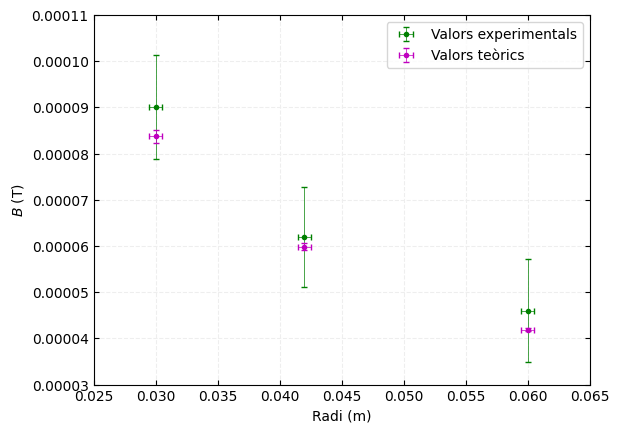

In [5]:

fig = plt.figure()
ax= fig.add_subplot()
ax.tick_params(direction='in', right=True, top=True)
ax.grid(color='#eeeeee', linestyle='--') #color y estilo de la cuadricula

#dades experimentals
ax.errorbar(radis,
                Br_exp,
                xerr = u_radis,
                yerr = u_Br_exp,
                capsize = 2,
                elinewidth = 0.5,
                linewidth = 0,
                marker = 'o',
                markersize = 3,
                markerfacecolor = 'g',
                markeredgecolor = 'g',
                ecolor = 'g',
                label ='Valors experimentals'
                )
#dades teoriques
ax.errorbar(radis,
                Br_teo,
                xerr = u_radis,
                yerr = u_Br_teo,
                capsize = 2,
                elinewidth = 0.5,
                linewidth = 0,
                marker = 'o',
                markersize = 3,
                markerfacecolor = 'm',
                markeredgecolor = 'm',
                ecolor = 'm',
                label ='Valors teòrics'
                )
plt.xlabel('Radi (m)')
plt.ylabel('$B$ (T)')
plt.xlim(0.025,0.065)
plt.ylim(0.00003,0.00011)
plt.legend()

###B en funció del nombre d'espires


In [6]:
N = np.array([1,2,3])
Bn_exp = np.array([eval(wse.acell('K22').value.replace(',','.')),
         eval(wse.acell('K29').value.replace(',','.')),
         eval(wse.acell('K36').value.replace(',','.'))])
u_Bn_exp = np.array([eval(wse.acell('L22').value.replace(',','.')),
         eval(wse.acell('L29').value.replace(',','.')),
         eval(wse.acell('L36').value.replace(',','.'))])
Bn_teo = np.array([eval(wse.acell('A24').value.replace(',','.')),
         eval(wse.acell('A31').value.replace(',','.')),
         eval(wse.acell('A38').value.replace(',','.'))])
u_Bn_teo = np.array([eval(wse.acell('B24').value.replace(',','.')),
         eval(wse.acell('B31').value.replace(',','.')),
         eval(wse.acell('B38').value.replace(',','.'))])

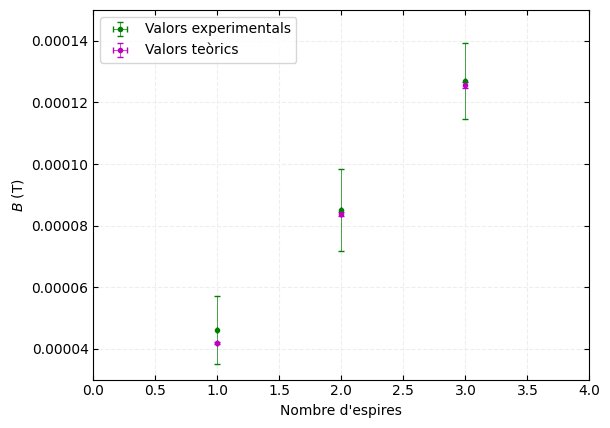

In [7]:
fig = plt.figure()
ax= fig.add_subplot()
ax.tick_params(direction='in', right=True, top=True)
ax.grid(color='#eeeeee', linestyle='--') #color y estilo de la cuadricula

ax.errorbar(N,
            Bn_exp,
            xerr = 0,
            yerr = u_Bn_exp,
            capsize = 2,
            elinewidth = 0.5,
            linewidth = 0,
            marker = 'o',
            markersize = 3,
            markerfacecolor = 'g',
            markeredgecolor = 'g',
            ecolor = 'g',
            label ='Valors experimentals'
            )
#dades teoriques
ax.errorbar(N,
            Bn_teo,
            xerr = 0,
            yerr = u_Bn_teo,
            capsize = 2,
            elinewidth = 0.5,
            linewidth = 0,
            marker = 'o',
            markersize = 3,
            markerfacecolor = 'm',
            markeredgecolor = 'm',
            ecolor = 'm',
            label ='Valors teòrics'
            )

plt.xlabel('Nombre d\'espires')
plt.ylabel('$B$ (T)')
plt.xlim(0,4)
plt.ylim(0.00003,0.00015)
plt.legend()

###Trobar $\mu_0$

In [8]:
Ie = eval(wse.acell('B3').value.replace(',','.'))
R3 = radis[2]

def Br(x, muk):
  return ((muk*Ie)/(2*x))

def Bn(x, muk):
  return (muk*Ie*x)/(2*R3)

print('Ajust B en funció del radi:\n')
fl.curveFit(Br, radis, Br_exp)
print('\nAjust B en funció del número de voltes:\n')
fl.curveFit(Bn, N, Bn_exp)

Ajust B en funció del radi:

a_0 = 1.3403478260869566e-06 \pm 1.8741500844566486e-08
R^2 = 0.9944600280504909

Ajust B en funció del número de voltes:

a_0 = 1.2792857142683123e-06 \pm 1.981418789007314e-08
R^2 = 0.9962784016714546


##Bobines


In [9]:
wsb = ss.worksheet('bobina')

Ib = eval(wsb.acell('B3').value.replace(',','.'))
u_Ib = eval(wsb.acell('C3').value.replace(',','.'))
mu = eval(wsb.acell('B2').value.replace(',','.'))


def B_bobinas(N, L, R, z):
  return ((mu*Ib*N)/(2*L))*(((z+L/2)/np.sqrt(R**2+(z+L/2)**2))-((z-L/2)/np.sqrt(R**2+(z-L/2)**2)))

# Valors de N, L, diametre per a cada bobina
bobina1 =[eval(wsb.acell('B8').value.replace(',','.')), #voltes
           eval(wsb.acell('B7').value.replace(',','.')), #longitud
           eval(wsb.acell('B6').value.replace(',','.'))] #diametre
bobina2 =[eval(wsb.acell('B18').value.replace(',','.')),
           eval(wsb.acell('B17').value.replace(',','.')),
           eval(wsb.acell('B16').value.replace(',','.'))]
bobina3 =[eval(wsb.acell('B28').value.replace(',','.')),
           eval(wsb.acell('B27').value.replace(',','.')),
           eval(wsb.acell('B26').value.replace(',','.'))]
bobina4 =[eval(wsb.acell('B38').value.replace(',','.')),
           eval(wsb.acell('B37').value.replace(',','.')),
           eval(wsb.acell('B36').value.replace(',','.'))]

bobina = [bobina1, bobina2, bobina3, bobina4]

# Incerteses de N, L, diametre per a cada bobina
inc1 =[0, #voltes
           eval(wsb.acell('C7').value.replace(',','.')), #longitud
           eval(wsb.acell('C6').value.replace(',','.'))] #diametre
inc2 =[0,
           eval(wsb.acell('C17').value.replace(',','.')),
           eval(wsb.acell('C16').value.replace(',','.'))]
inc3 =[0,
           eval(wsb.acell('C27').value.replace(',','.')),
           eval(wsb.acell('C26').value.replace(',','.'))]
inc4 =[0,
           eval(wsb.acell('C37').value.replace(',','.')),
           eval(wsb.acell('C36').value.replace(',','.'))]

inc = [inc1, inc2, inc3, inc4]



In [19]:
ranges = ['B13:K13','B23:K23','B33:K33','B43:K43']
teorics = []
u_teorics = []

# Per a cada bobina
for b in list(range(4)):

  # Numero de voltes a la bobina
  Nb = bobina[b][0]

  # Declaracio de les variables involucrades en el calcul de propagacio dincertesa
  L = fl.Variable('L', bobina[b][1], inc[b][1])
  R = fl.Variable('R', bobina[b][2]/2, inc[b][2]/2)
  zep = fl.Variable('zep', bobina[b][1]/2, inc[b][1])
  zen = fl.Variable('zen', -bobina[b][1]/2, inc[b][1])
  zm = fl.Variable('zm', 0, inc[b][1])
  zmp = fl.Variable('zmp', bobina[b][1]/4, inc[b][1])
  zmn = fl.Variable('zmn', -bobina[b][1]/4, inc[b][1])
  i  = fl.Variable('I', Ib, u_Ib)

#((mu*Ib*N)/(2*L))*(((z+L/2)/np.sqrt(R**2+(z+L/2)**2))-((z-L/2)/np.sqrt(R**2+(z-L/2)**2)))


  # Fórmules per els camps en diferents valors de z
  B_ep_sim = ((mu*i.sim*Nb)/(2*L.sim))*(((zep.sim+L.sim/2)/sym.sqrt(R.sim**2+(zep.sim+L.sim/2)**2))-
        ((zep.sim-L.sim/2)/sym.sqrt(R.sim**2+(zep.sim-L.sim/2)**2)))
  B_en_sim = ((mu*i.sim*Nb)/(2*L.sim))*(((zen.sim+L.sim/2)/sym.sqrt(R.sim**2+(zen.sim+L.sim/2)**2))-
        ((zen.sim-L.sim/2)/sym.sqrt(R.sim**2+(zen.sim-L.sim/2)**2)))
  B_m_sim = ((mu*i.sim*Nb)/(2*L.sim))*(((zm.sim+L.sim/2)/sym.sqrt(R.sim**2+(zm.sim+L.sim/2)**2))-
        ((zm.sim-L.sim/2)/sym.sqrt(R.sim**2+(zm.sim-L.sim/2)**2)))
  B_mp_sim = ((mu*i.sim*Nb)/(2*L.sim))*(((zmp.sim+L.sim/2)/sym.sqrt(R.sim**2+(zmp.sim+L.sim/2)**2))-
        ((zmp.sim-L.sim/2)/sym.sqrt(R.sim**2+(zmp.sim-L.sim/2)**2)))
  B_mn_sim = ((mu*i.sim*Nb)/(2*L.sim))*(((zmn.sim+L.sim/2)/sym.sqrt(R.sim**2+(zmn.sim+L.sim/2)**2))-
        ((zmn.sim-L.sim/2)/sym.sqrt(R.sim**2+(zmn.sim-L.sim/2)**2)))

  # calcul de les incerteses del camp teoric
  B_ep, iB_ep =  fl.propIncertesa(B_ep_sim,[L,R,zep,i])
  B_en, iB_en = fl.propIncertesa(B_en_sim,[L,R,zen,i])
  B_m, iB_m = fl.propIncertesa(B_m_sim,[L,R,zm,i])
  B_mp, iB_mp = fl.propIncertesa(B_mp_sim,[L,R,zmp,i])
  B_mn, iB_mn = fl.propIncertesa(B_mn_sim,[L,R,zmn,i])

  teorics.append([B_en,B_mn,B_m,B_mp,B_ep])
  u_teorics.append([iB_en,iB_mn,iB_m,iB_mp,iB_ep])

  # Seleccio de les celles a canviar
  cell_list = wsb.range(ranges[b])

  values = [B_en, iB_en,
            B_mn, iB_mn,
            B_m, iB_m,
            B_mp, iB_mp,
            B_ep, iB_ep]

  # Canviem el valor de les celles
  for i, val in enumerate(values):  #(index, valor)
      cell_list[i].value = str(val)

  wsb.update_cells(cell_list)


###Bobina 1

In [20]:
L = 0.17
zs = [-L/2, -L/4, 0, L/4, L/2]

b1 =[eval(wsb.acell('B12').value.replace(',','.')),
     eval(wsb.acell('D12').value.replace(',','.')),
     eval(wsb.acell('F12').value.replace(',','.')),
     eval(wsb.acell('H12').value.replace(',','.')),
     eval(wsb.acell('J12').value.replace(',','.'))]
b2 =[eval(wsb.acell('B22').value.replace(',','.')),
     eval(wsb.acell('D22').value.replace(',','.')),
     eval(wsb.acell('F22').value.replace(',','.')),
     eval(wsb.acell('H22').value.replace(',','.')),
     eval(wsb.acell('J22').value.replace(',','.'))]
b3 =[eval(wsb.acell('B32').value.replace(',','.')),
     eval(wsb.acell('D32').value.replace(',','.')),
     eval(wsb.acell('F32').value.replace(',','.')),
     eval(wsb.acell('H32').value.replace(',','.')),
     eval(wsb.acell('J32').value.replace(',','.'))]
b4 =[eval(wsb.acell('B42').value.replace(',','.')),
     eval(wsb.acell('D42').value.replace(',','.')),
     eval(wsb.acell('F42').value.replace(',','.')),
     eval(wsb.acell('H42').value.replace(',','.')),
     eval(wsb.acell('J42').value.replace(',','.'))]

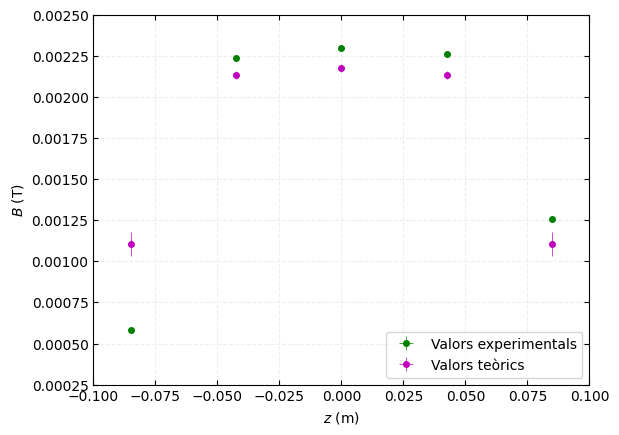

In [25]:
fig = plt.figure()
ax= fig.add_subplot()
ax.tick_params(direction='in', right=True, top=True)
ax.grid(color='#eeeeee', linestyle='--') #color y estilo de la cuadricula

ax.errorbar(zs,
            b1,
            xerr = 0.001,
            yerr = 0.00001,
            capsize = 0,
            elinewidth = 0.5,
            linewidth = 0,
            marker = 'o',
            markersize = 4,
            markerfacecolor = 'g',
            markeredgecolor = 'g',
            ecolor = 'g',
            label ='Valors experimentals'
            )

#dades teoriques
ax.errorbar(zs,
            teorics[0],
            xerr = 0.001,
            yerr = u_teorics[0],
            capsize = 0,
            elinewidth = 0.5,
            linewidth = 0,
            marker = 'o',
            markersize = 4,
            markerfacecolor = 'm',
            markeredgecolor = 'm',
            ecolor = 'm',
            label ='Valors teòrics'
            )

plt.xlabel('$z$ (m)')
plt.ylabel('$B$ (T)')
plt.xlim(-0.1,0.1)
plt.ylim(0.00025,0.00250)
plt.legend(loc='lower right')

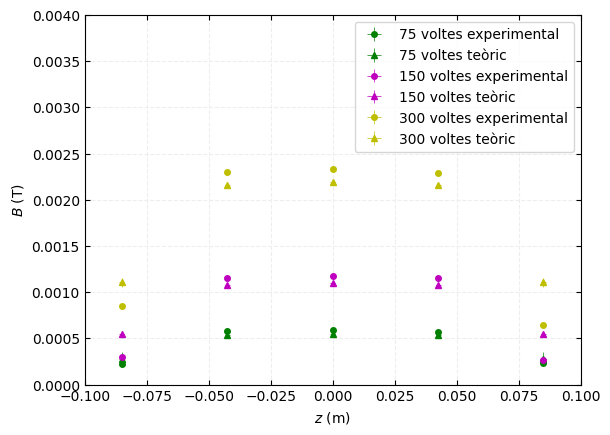

In [24]:
fig = plt.figure()
ax= fig.add_subplot()
ax.tick_params(direction='in', right=True, top=True)
ax.grid(color='#eeeeee', linestyle='--') #color y estilo de la cuadricula

ax.errorbar(zs,
            b2,
            xerr = 0.001,
            yerr = 0.00001,
            capsize = 0,
            elinewidth = 0.5,
            linewidth = 0,
            marker = 'o',
            markersize = 4,
            markerfacecolor = 'g',
            markeredgecolor = 'g',
            ecolor = 'g',
            label ='75 voltes experimental'
            )
#dades teoriques
ax.errorbar(zs,
            teorics[1],
            xerr = 0.001,
            yerr = u_teorics[0],
            capsize = 0,
            elinewidth = 0.5,
            linewidth = 0,
            marker = '^',
            markersize = 4,
            markerfacecolor = 'g',
            markeredgecolor = 'g',
            ecolor = 'g',
            label ='75 voltes teòric'
            )
ax.errorbar(zs,
            b3,
            xerr = 0.001,
            yerr = 0.00001,
            capsize = 0,
            elinewidth = 0.5,
            linewidth = 0,
            marker = 'o',
            markersize = 4,
            markerfacecolor = 'm',
            markeredgecolor = 'm',
            ecolor = 'm',
            label ='150 voltes experimental'
            )
#dades teoriques
ax.errorbar(zs,
            teorics[2],
            xerr = 0.001,
            yerr = u_teorics[1],
            capsize = 0,
            elinewidth = 0.5,
            linewidth = 0,
            marker = '^',
            markersize = 4,
            markerfacecolor = 'm',
            markeredgecolor = 'm',
            ecolor = 'm',
            label ='150 voltes teòric'
            )
ax.errorbar(zs,
            b4,
            xerr = 0.001,
            yerr = 0.00001,
            capsize = 0,
            elinewidth = 0.5,
            linewidth = 0,
            marker = 'o',
            markersize = 4,
            markerfacecolor = 'y',
            markeredgecolor = 'y',
            ecolor = 'y',
            label ='300 voltes experimental'
            )
#dades teoriques
ax.errorbar(zs,
            teorics[3],
            xerr = 0.001,
            yerr = u_teorics[2],
            capsize = 0,
            elinewidth = 0.5,
            linewidth = 0,
            marker = '^',
            markersize = 4,
            markerfacecolor = 'y',
            markeredgecolor = 'y',
            ecolor = 'y',
            label ='300 voltes teòric'
            )
plt.xlabel('$z$ (m)')
plt.ylabel('$B$ (T)')
plt.xlim(-0.1,0.1)
plt.ylim(0.,0.004)
plt.legend()